<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Predictive Machine Learning with scikit-learn

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2025.

This chapter is a tutorial for / demonstration of **Predictive Machine Learning with scikit-learn**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Predictive Machine Learning in Python with sckit-learn](https://youtu.be/EbYePnjWB5o?si=dd7SpbQlQgMhFGZ5)
* [Machine Learning in Python with Pipelines](https://youtu.be/tYrPs8s1l9U?si=5OMrFm7rlK6koR6g)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation for Predictive Machine Learning with scikit-learn

This chapter is unusual for me. As a professor, I avoid lectures that focus on the specific tools, as I would rather teach the principles and then introduce the examples with the common tools. It is my opinion that,

* theory will outlast any available software tools

* without a theory focus I may encourage black-box model use

* with a strong understanding of the theory, one could pick up any software as needed

But in this case, 

* [scikit-learn](https://scikit-learn.org/) is such a common machine learning package for machine learning that is very widely used

* throughout this e-book I use scikit-learn

* scikit-learn uses a nuts and bolts approach to build machine learning workflows that maximizes flexibility

* scikit-learn provides the theory in the docs or links to original publications

In summary, scikit-learn get me and I see the package as a partner in education! Thank you!

So I have decided to add this chapter focused on the methods for machine learning modeling with scikit-learn. 


#### Machine Learning-based Prediction

Here's a simple workflow, demonstration of scikit-learn training and tuning a machine learning model with a simple dataset.  

* I provide this as the most basic, minimum Python workflow to assist those learning predictive machine learning

* I demonstration model training and tuning (by-hand and automatically), including the pipeline approach

* Given the 1 predictor feature and 1 response for ease of data and model visualization

This provides an opportunity to run and visualize a variety of machine learning models for experiential learning.

#### Machine Learning-based Prediction

We build a decision tree-based predictive machine learning models with supervised learning: 

**Prediction**

* non-parametric method for regression (continuous response) and classification (categorical response)

* a function $\hat{f}$ of the nearest $k$ training data in predictor feature space such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form: 

\begin{equation}
\hat{Y} = \hat{f}(X_1,\ldots,X_m) + \epsilon
\end{equation}

where $\epsilon$ is an error term.

**Supervised Learning**

* the response feature, $Y$, is available over the training and testing data

#### Load the Required Libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [3]:
ignore_warnings = True                                        # ignore warnings?
import os                                                     # to set current working directory 
import pandas as pd                                           # DataFrames and plotting
import numpy as np                                            # arrays and matrix math
import matplotlib.pyplot as plt                               # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from sklearn import metrics                                   # measures to check our models
from sklearn.model_selection import train_test_split          # random train and test data split
from sklearn import tree                                      # tree program from scikit learn (package for machine learning)
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the Random Number Seed

These workflows and models may use random processes, e.g.:

* random train and test split with cross validation and k-fold cross validation
* random selection of a subset of features to consider for the next split

In [5]:
np.random.seed(seed)                                        # scikit-learn uses the NumPy seed

#### Declare functions

Let's define a function for plotting gridlines. 

In [7]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [9]:
# not needed currently
#os.chdir("c:/PGE383")                                       # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Read the data table

We use a data "1D_Porosity.csv" comma delimited file from my GitHub [GeoDataSets Respository](https://github.com/GeostatsGuy/GeoDataSets).  

* this code loads the data directly from my GitHub repository.
* if you have the data file available locally (i.e. you are not connected to the internet) set the working directory to the location with the data file and use the second line below

In [11]:
my_data = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/1D_Porosity.csv") # load the comma delimited data file
#my_data = pd.read_csv("1D_Porosity.csv")                     # load the comma delimited data file locally
X = pd.DataFrame(data = my_data.loc[:,'Depth'])               # ensure X and y features are DataFrames
y = pd.DataFrame(data = my_data.loc[:,'Nporosity'])
X.head(n=2); y.head(n=2)                                      # preview the predictor feature
print('Loaded ' + str(len(my_data)) + ' samples, with features = ' + str(my_data.columns.values) + '.')

Loaded 40 samples, with features = ['Depth' 'Nporosity'].


#### Plot the Available Data

Let's do a simple scatter plot to check the data.

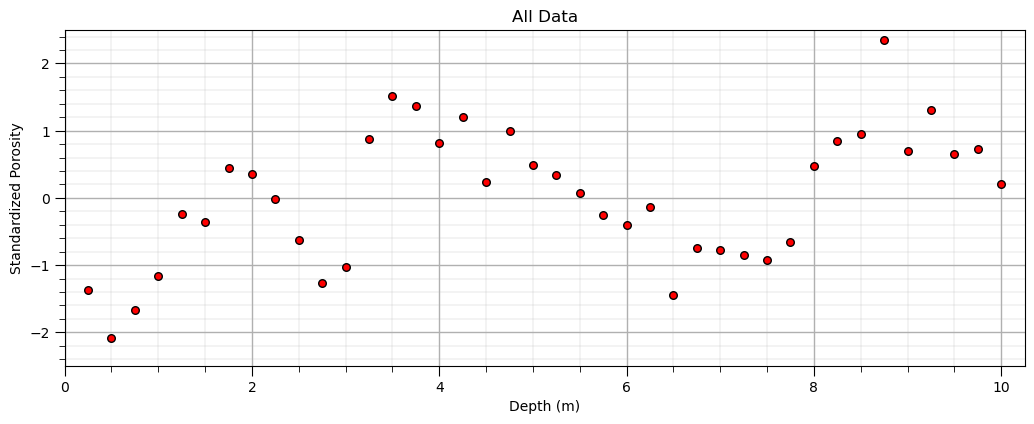

In [13]:
plt.scatter(X,y,color='red',s=30,edgecolor='black',alpha=1.0); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.title('All Data'); 
plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Optional: Add Random Error to the Response Feature, $y$

For more experiential learning consider repeating this workflow with different amounts of additional error

* to observe issues of model overfit consider adding some additional error, 

```python 
error_stdev = 0.0                                           # standard deviation of additional random error
```

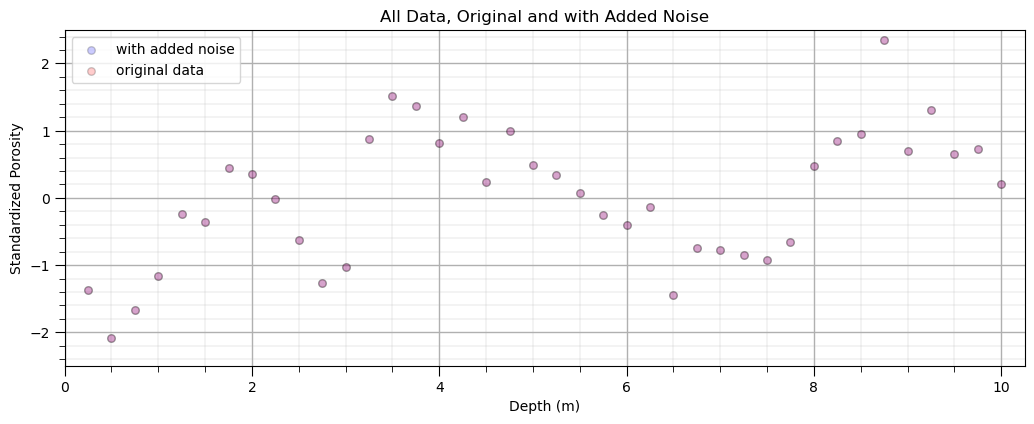

In [15]:
error_stdev = 0.0                                             # standard deviation of additional random error
y_orig = y.copy(deep = True)                                  # make a deep copy of original dataset
y['Nporosity'] = y['Nporosity'] + np.random.normal(loc = 0, scale = error_stdev, size = y.shape[0])
plt.scatter(X,y,color='blue',s=30,edgecolor='black',alpha=0.2,label='with added noise'); plt.xlabel('Depth (m)'); 
plt.ylabel('Standardized Porosity'); plt.title('All Data, Original and with Added Noise'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5])
plt.scatter(X,y_orig,color='red',s=30,edgecolor='black',alpha=0.2,label='original data'); plt.xlabel('Depth (m)'); 
plt.ylabel('Standardized Porosity'); plt.legend(loc='upper left')
plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Fast Forward Through Data Analytics

This workflow is focussed on building predictive machine learning models

* for brevity we skip data checking, data analytics, statistical analysis, feature transformations etc. 

* we skip all the way to model building

* we don't even discuss model selection, feature selection, nor robust hyperparameter tuning

This is the most simple predictive machine learning workflow possible!

* basics for machine learning with scikit-learn in Python. Nothing more.

#### Let's Build a Predictive Machine Learning Model

We use the following steps to build our model

1. **instantiate** the machine learning model with hyperparameters
2. **fit**, train the machine learing model to the training data
3. **predict**, check the trained machine learning models to predict at withheld testing data
4. **select** the optimum hyperparameters, hyperparameter tuning
5. **refit** the model by training with all data given the tuned hyperparmaeters 

We will use the train - test approach, an alternative is the train, validate and test approach. 

* we will start simple and cover k-fold cross validation and scikit-learn pipeline class later

#### Split Train and Test

We will demonstrate the following hyperparameter tuning methods:

* **cross validation** - split 25% of data as withheld testing data, only 25% of data are tested
* **k-fold cross validation** - calculate average error over k folds, all data are tested

Let's start with cross validation and then demonstrate k-fold cross validation.

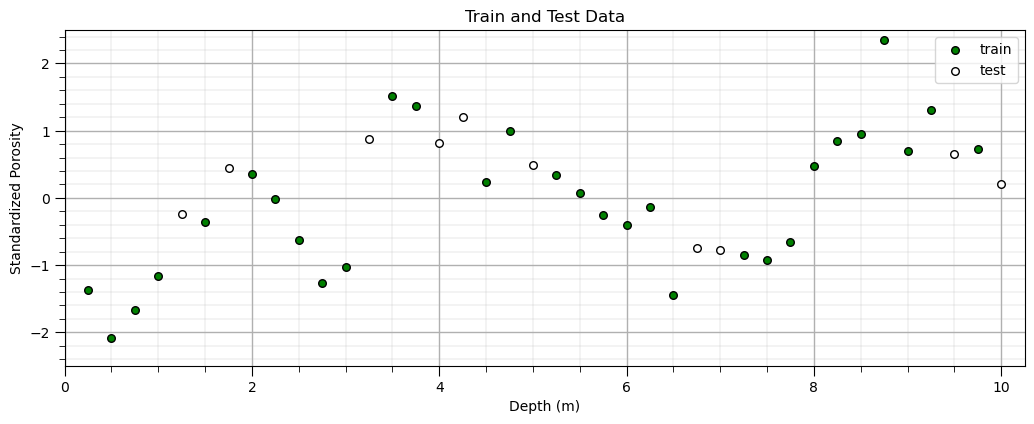

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=seed) # train and test split
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=1.0,label='train'); plt.xlabel('Depth (m)') 
plt.ylabel('Standardized Porosity'); plt.title('Train and Test Data'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]) 
plt.scatter(X_test,y_test,color='white',s=30,edgecolor='black',alpha=1.0,label='test'); plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity');plt.legend(loc='upper right'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Build a Decision Tree Model

Let's instantiate (set the hyperparameter(s)) and fit (train with training data) a decision tree regression model to our data. 

In [19]:
max_leaf_nodes = 6                                            # set the hyperparameter
our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes) # instantiate the model
our_tree = our_tree.fit(X_train, y_train)                     # fit the model to the trainin data

#### Predict With a Decision Tree Model

Now let's make a prediction with our trained decision tree model.

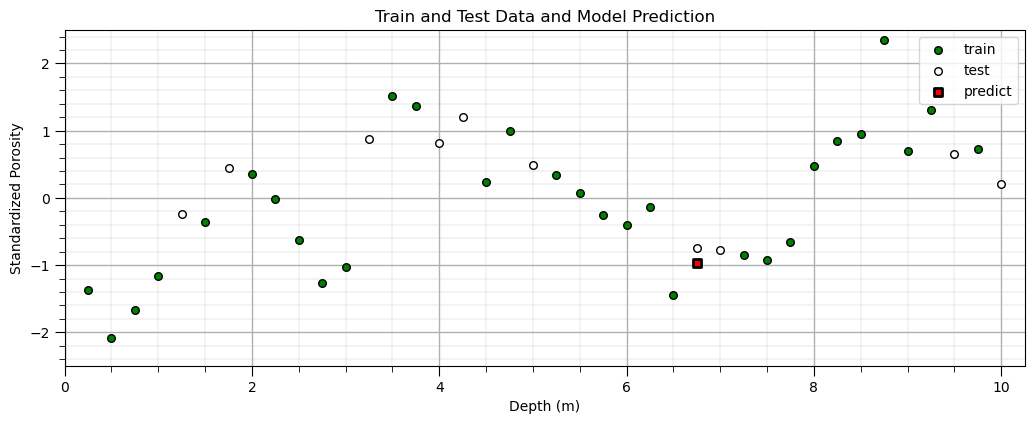

In [21]:
itest = 3; depth = X_test['Depth'].values[itest]            # set the predictor value for our prediction
spor = our_tree.predict([[depth]])                          # predict with our trained model
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=1.0,label='train'); plt.xlabel('Depth (m)'); 
plt.ylabel('Standardized Porosity'); plt.title('Train and Test Data and Model Prediction'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]) 
plt.scatter(X_test,y_test,color='white',s=30,edgecolor='black',alpha=1.0,label='test'); plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity');plt.legend(loc='upper right')
plt.scatter(depth,spor,color='red',s=30,marker='s',edgecolor='black',alpha=1.0,lw=2,label='predict'); plt.xlabel('Depth (m)') 
plt.ylabel('Standardized Porosity');plt.legend(loc='upper right'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2); add_grid()

#### Predict Over a Range of Predictor Feature Values with a Decision Tree Model

Now, let's make predictions over a range of predictor feature values so we can visualize the model.

* this is easy to do since we have just 1 predictor feature

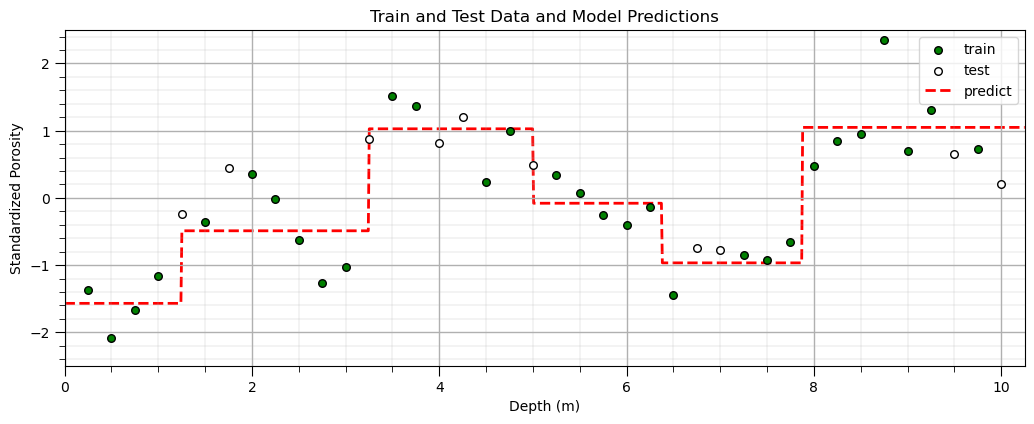

In [23]:
depths = np.linspace(0,10.25,1000)                          # set the predictor values for our prediction
spors = our_tree.predict(depths.reshape(-1, 1))             # predict with our trained model
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=1.0,label='train'); plt.xlabel('Depth (m)') 
plt.ylabel('Standardized Porosity'); plt.title('Train and Test Data and Model Predictions'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5])
plt.scatter(X_test,y_test,color='white',s=30,edgecolor='black',alpha=1.0,label='test'); plt.xlabel('Depth (m)') 
plt.ylabel('Standardized Porosity');plt.legend(loc='upper right')
plt.plot(depths,spors,color='red',alpha=1.0,label='predict',linestyle='--',lw=2,zorder=-1); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity')
plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); add_grid()
plt.legend(loc='upper right'); plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Changing the Model Hyperparameter(s)

Let's try changing the model complexity and refitting the model.

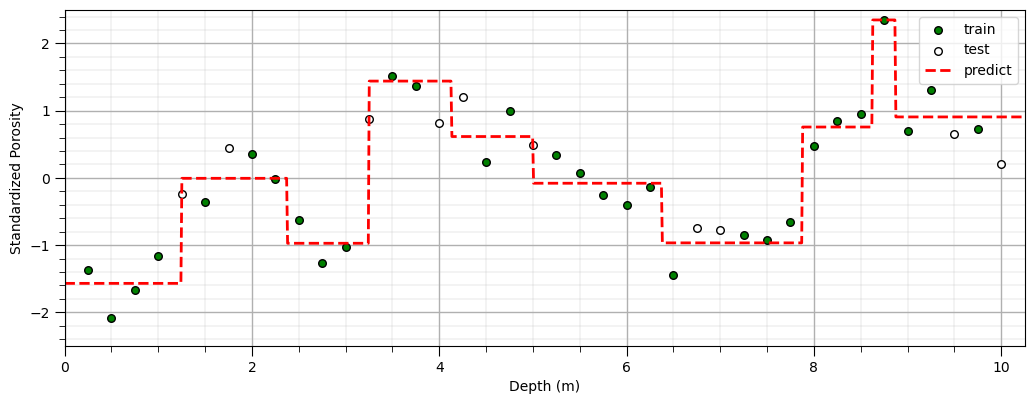

In [25]:
max_leaf_nodes = 10                                         # set the hyperparameter
our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes) # instantiate the model
our_tree = our_tree.fit(X_train, y_train)                   # fit the model to the trainin data
spors = our_tree.predict(depths.reshape(-1, 1))             # predict with our trained model
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=1.0,label='train'); 
plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]) 
plt.scatter(X_test,y_test,color='white',s=30,edgecolor='black',alpha=1.0,label='test'); plt.xlabel('Depth (m)')
plt.ylabel('Standardized Porosity');plt.legend(loc='upper right')
plt.plot(depths,spors,color='red',alpha=1.0,label='predict',linestyle='--',lw=2); plt.xlabel('Depth (m)'); 
plt.ylabel('Standardized Porosity');plt.legend(loc='upper right'); plt.xlim([0,10.25]); plt.ylim([-2.5,2.5]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Tuning the Model Hyperparameter(s)

To tune the model hyperparameters we need a metric to summarize model error over the withheld testing data

* let's predict at the testing data and calculate our metric, testing mean square error. 

In [27]:
leaf_nodes = 7                                              # set the hyperparameter
our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = leaf_nodes) # instantiate the model
our_tree = our_tree.fit(X_train, y_train)                   # fit the model to the trainin data
y_predict = our_tree.predict(X_test)                        # predict at the testing data locations
mse = metrics.mean_squared_error(y_test,y_predict)
print('Testing MSE is ' + str(round(mse,2)) + '.')

Testing MSE is 0.67.


and we need to rebuild the model with a variable level of complexity

* let's loop over the number of leaf nodes and plot the performance over the withheld testing data

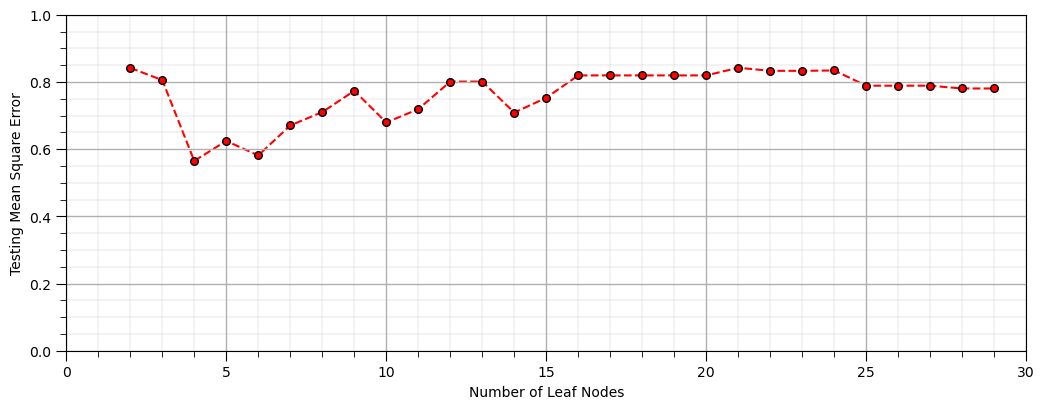

In [29]:
nodes = []; scores = []; max_leaf_nodes = 30
for i, nnode in enumerate(np.arange(2,max_leaf_nodes,1)):
    our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = nnode).fit(X_train, y_train) # instantiate / fit
    y_predict = our_tree.predict(X_test)                    # predict at the testing data locations
    nodes.append(nnode); scores.append(metrics.mean_squared_error(y_test,y_predict))
plt.scatter(nodes,scores,color='red',s=30,edgecolor='black',alpha=1.0,label='train'); 
plt.plot(nodes,scores,color='red',alpha=1.0,linestyle='--',zorder=-1); plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity') 
plt.xlim([1,max_leaf_nodes]); plt.xlabel('Number of Leaf Nodes'); plt.ylabel('Testing Mean Square Error')
plt.xlim([0,max_leaf_nodes]); plt.ylim([0.0,1.0]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2)

For a more robust assessment of performance let's use scikit-learns k-fold cross validation.

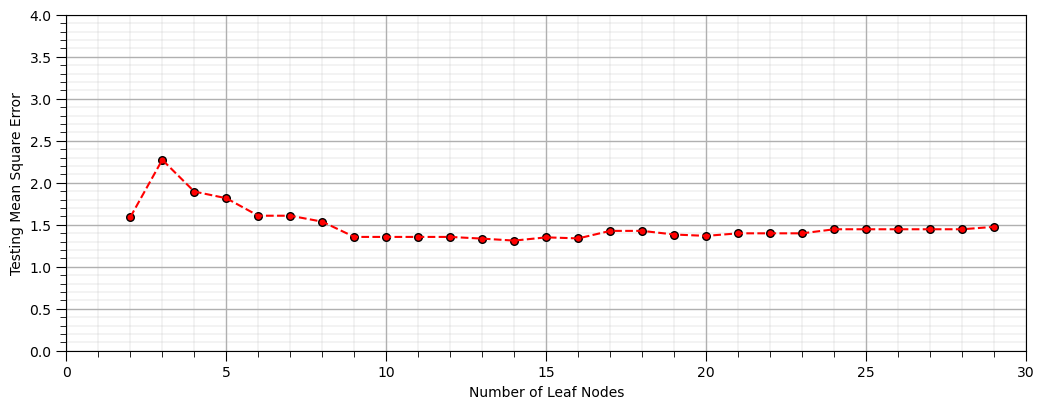

In [31]:
from sklearn.model_selection import cross_val_score as kfold       # cross validation methods
nodes = []; scores = []; max_leaf_nodes = 30
for i, nnode in enumerate(np.arange(2,max_leaf_nodes,1,dtype = int)):
    our_tree = tree.DecisionTreeRegressor(max_leaf_nodes = nnode) # instantiate / fit
    nodes.append(nnode); 
    scores.append(abs(kfold(estimator=our_tree,X=X,y=y,cv=4,n_jobs=4,scoring = "neg_mean_squared_error").mean()))
plt.scatter(nodes,scores,color='red',s=30,edgecolor='black',alpha=1.0,label='train')
plt.plot(nodes,scores,color='red',alpha=1.0,linestyle='--'); plt.xlabel('Depth (m)') 
plt.ylabel('Standardized Porosity'); plt.xlim([1,max_leaf_nodes]); plt.xlabel('Number of Leaf Nodes'); plt.ylabel('Testing Mean Square Error')
plt.xlim([0,max_leaf_nodes]); plt.ylim([0.0,4.0]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2)

The main product from all of the previous work is the tuned hyperparameter, the optimum model complexity. 

* now we refit the tuned model, train the model on all the data and our tuned model is ready for real-world use

* once again we are assuming a train and test workflow, not a train, validate and test workflow

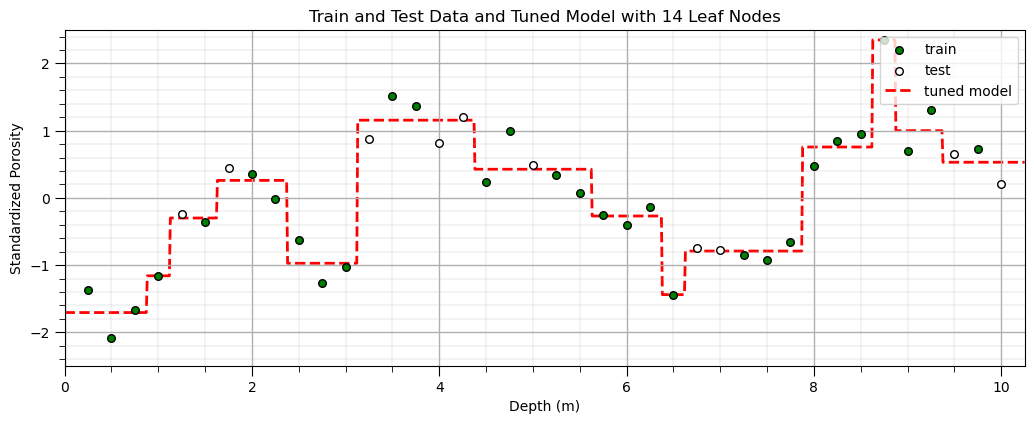

In [33]:
tuned_nodes = nodes[np.argmin(scores)]
our_tuned_tree = tree.DecisionTreeRegressor(max_leaf_nodes = tuned_nodes).fit(X, y) # instantiate / fit
tuned_spors = our_tuned_tree.predict(depths.reshape(-1, 1))             # predict with our trained model
plt.scatter(X_train,y_train,color='green',s=30,edgecolor='black',alpha=1.0,label='train')
plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity')
plt.title('Train and Test Data and Tuned Model with ' + str(tuned_nodes) + ' Leaf Nodes')
plt.xlim([0,10.25]); plt.ylim([-2.5,2.5])
plt.scatter(X_test,y_test,color='white',s=30,edgecolor='black',alpha=1.0,label='test'); 
plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right')
plt.plot(depths,tuned_spors,color='red',alpha=1.0,label='tuned model',linestyle='--',lw=2,zorder=-1); 
plt.xlabel('Depth (m)'); plt.ylabel('Standardized Porosity');plt.legend(loc='upper right'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2);

#### Complete Workflow with Pipelines

Let's repeat the above workflow with a pipline from scikit-learn. Here some general comments:

* **pipeline workflow steps** - list of steps, custom labels and the associated scikit-learn classes
* **choices and hyperparameters** - as a dictionary with combined step custom labels and hyperparameter names
* **workflow scenarios** - we can specify lists of choices and hyperparameters
* **consistent iteration** - the entire workflow is repeated for the full combinatorial
* **best model selected** - best combination of model hyperparameters and choices are refit with all data

In [35]:
from sklearn.pipeline import Pipeline                       # machine learning modeling pipeline
pipe = Pipeline([                                           # the machine learning workflow as a pipeline object
    ('tree', tree.DecisionTreeRegressor())
])

params = {                                                  # the machine learning workflow method's parameters
    'tree__max_leaf_nodes': np.arange(2,max_leaf_nodes,1,dtype = int)
}

from sklearn.model_selection import GridSearchCV            # model hyperparameter grid search
grid_cv_tuned = GridSearchCV(pipe, params, scoring = 'neg_mean_squared_error', # grid search cross validation 
                             cv=4,refit = True);

grid_cv_tuned.fit(X,y);                                      # fit model with tuned hyperparameters
print('Tuned maximum number of leaf nodes = ' + str(grid_cv_tuned.best_params_['tree__max_leaf_nodes']) + '.')
depth = 2.5
print('Prediction at depth = ' + str(depth) + ' m is ' + str(np.round(grid_cv_tuned.predict([[depth]]),2))) # predict with our trained model) + '.')

Tuned maximum number of leaf nodes = 14.
Prediction at depth = 2.5 m is [-0.97]


#### Comments

This was a very simple demonstration of predictive machine learning model building with Python's scikit-learn.

* this is a basic introduction, much more could be done

I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  